In [1]:
import numpy as np
import platform
from PIL import ImageFont, ImageDraw, Image
from matplotlib import pyplot as plt
 
import uuid
import json
import time
import cv2
import requests

In [2]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [3]:
def put_text(image, text, x, y, color=(0, 255, 0), font_size=22):
    if type(image) == np.ndarray:
        color_coverted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = Image.fromarray(color_coverted)
 
    if platform.system() == 'Darwin':
        font = 'AppleGothic.ttf'
    elif platform.system() == 'Windows':
        font = 'malgun.ttf'
        
    image_font = ImageFont.truetype(font, font_size)
    font = ImageFont.load_default()
    draw = ImageDraw.Draw(image)
 
    draw.text((x, y), text, font=image_font, fill=color)
    
    numpy_image = np.array(image)
    opencv_image = cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR)
 
    return opencv_image

In [4]:
api_url = 'https://4u8idthcon.apigw.ntruss.com/custom/v1/18269/7b6fb8930df2f5e77610ddfa5935d16393e3f302cc13a4926135c84ae20c53a3/general'
secret_key = 'dW9nZ1pvZXN3RXN1aVFLbkRFS1FsU2F2UWRaUWRjbHg='

In [45]:
path = '../data/test/test_00012.png'
files = [('file',open(path, 'rb'))]

In [46]:
request_json = {'images': [{'format': 'jpg',
                                'name': 'demo'
                               }],
                    'requestId': str(uuid.uuid4()),
                    'version': 'V2',
                    'timestamp': int(round(time.time() * 1000))
                   }
 
payload = {'message': json.dumps(request_json).encode('UTF-8')}
 
headers = {
  'X-OCR-SECRET': secret_key,
}
 
response = requests.request("POST", api_url, headers=headers, data=payload, files=files)
result = response.json()

피엘라벤
진주점


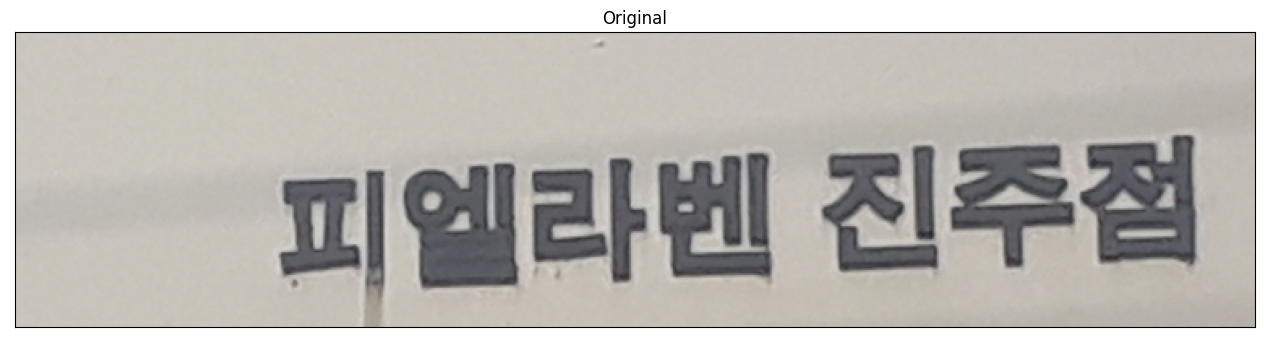

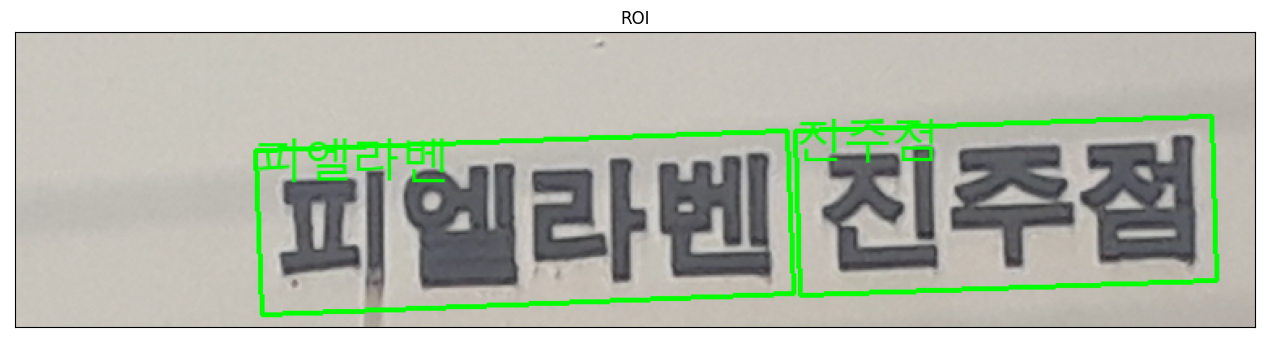

In [47]:
img = cv2.imread(path)
roi_img = img.copy()
 
for field in result['images'][0]['fields']:
    text = field['inferText']
    vertices_list = field['boundingPoly']['vertices']
    pts = [tuple(vertice.values()) for vertice in vertices_list]
    topLeft = [int(_) for _ in pts[0]]
    topRight = [int(_) for _ in pts[1]]
    bottomRight = [int(_) for _ in pts[2]]
    bottomLeft = [int(_) for _ in pts[3]]
 
    cv2.line(roi_img, topLeft, topRight, (0,255,0), 2)
    cv2.line(roi_img, topRight, bottomRight, (0,255,0), 2)
    cv2.line(roi_img, bottomRight, bottomLeft, (0,255,0), 2)
    cv2.line(roi_img, bottomLeft, topLeft, (0,255,0), 2)
    roi_img = put_text(roi_img, text, topLeft[0], topLeft[1] - 10, font_size=30)
    
    print(text)
 
plt_imshow("Original", img,  figsize=(16, 10))
plt_imshow("ROI", roi_img, figsize=(16, 10))

    

In [44]:
text

'국내산'

In [54]:
import pandas as pd
from tqdm import tqdm
import os

test_df = pd.read_csv('../data/test.csv')

results = []
for i_path in test_df['img_path']:
    path = os.path.join('../data',i_path[2:])
    files = [('file',open(path, 'rb'))]
    request_json = {'images': [{'format': 'jpg',
                                'name': 'demo'
                               }],
                    'requestId': str(uuid.uuid4()),
                    'version': 'V2',
                    'timestamp': int(round(time.time() * 1000))
                   }
 
    payload = {'message': json.dumps(request_json).encode('UTF-8')}
 
    headers = {
                'X-OCR-SECRET': secret_key,
            }       
 
    response = requests.request("POST", api_url, headers=headers, data=payload, files=files)
    result = response.json()
    img = cv2.imread(path)
    roi_img = img.copy()
    
    text = ''
    try:
        for field in result['images'][0]['fields']:
            t = field['inferText']
            text = "".join([text,t])
        results.append(text)
        print(text)
    except:
        results.append(text)





덕천중학교
로뎀노인요양원
한우리건축사사무소
배꼽시계


신선육국내산
피엘라벤진주점
수조관


성원유리가공사
●

왕비화
시카고뽑
강남장여관
저맨내
래쉬어이
뷰티아카데
홀데0
실사현수막
객2
시다
편의시설

체형관리

체코흑생맥주전문점
가야학원
톄크노스
뉴캐슬호텔




퀸즈헤어
정형외과
윤메
다귀탕

둘리분식
고봉라이온스클럽


삼성홈이앤씨
공인중개사

효도마을요양원
프라임 리빙텔
셀프사진관



수원가정법원
해피하우
신우엠에스
부부한의원

IO


미래한의원

현대부동산
팡
자동차절비
프겨채
미테리어
대한독립싱크
한빛학원


계란말이
상하루



용인소방서
잘생
촬영으로
자연치과
T
J
정직한이름
맘모스문구
헤어
전기OI
0

뽀송뽀송
9력
시

슈퍼올리브영
전용주차장
·게OEIo
신동백스크린골프




주택청약
종합저축
빅사즈
짚시뚱
악세사리

위험고압가스
화기엄

·
양갈팽
각종리

수성실코■

때

모I0


허논미역
죽을듯이
국가자격증
주저


처사리U


메가타운
브자리

쭈꾸미철판

에비뉴 헤어
H

스
속에천불

태저
NJH
초목한의원

왕솥뚜껑삼겹살
사조네이z
부강할머니
마마식당
헤어도로시
라꽃집






영습장

칠도당
새롬학원

H
농산

엄마삼밥집
코딤z

WC튜
새롬생삼겹살
여자들세상
랑

O
드림빌딩
한국일보
알뜰
러브러브
온유헤어
o양
화이트치킨


김선영화실
성
지존타우
세종씨엠에스
해드림하우스

전민마트

크로스빌전문점



래실
컴퓨터원
H
00성z다발
백美
버헤o


한소담족발



망빔
일


청신종합주방


가위와빗



E

보성빌
준경빌라

악

졸리졸리


트운
학고
붐비

골목미장원

실내포차

GFH칩스

중앙기계상회
박미선우리옷
한복공방

진명?서
시무소
해영속
□·봄
로우


온누리약국
홍지수
에스테틱
성결한방병원



시부산약






연
제옹기
떼규방송
금방
K
r
릭2자




김종화가구갤러리
세


마음수련
F

이랑곳방
서목= "콩


I실

탁서

태권도
협

끼리의
술가방

컴퓨터
세탁소

In [55]:
results

['',
 '',
 '',
 '',
 '덕천중학교',
 '로뎀노인요양원',
 '한우리건축사사무소',
 '배꼽시계',
 '',
 '',
 '신선육국내산',
 '피엘라벤진주점',
 '수조관',
 '',
 '',
 '성원유리가공사',
 '●',
 '',
 '왕비화',
 '시카고뽑',
 '강남장여관',
 '저맨내',
 '래쉬어이',
 '뷰티아카데',
 '홀데0',
 '실사현수막',
 '객2',
 '시다',
 '편의시설',
 '',
 '체형관리',
 '',
 '체코흑생맥주전문점',
 '가야학원',
 '톄크노스',
 '뉴캐슬호텔',
 '',
 '',
 '',
 '',
 '퀸즈헤어',
 '정형외과',
 '윤메',
 '다귀탕',
 '',
 '둘리분식',
 '고봉라이온스클럽',
 '',
 '',
 '삼성홈이앤씨',
 '공인중개사',
 '',
 '효도마을요양원',
 '프라임 리빙텔',
 '셀프사진관',
 '',
 '',
 '',
 '수원가정법원',
 '해피하우',
 '신우엠에스',
 '부부한의원',
 '',
 'IO',
 '',
 '',
 '미래한의원',
 '',
 '현대부동산',
 '팡',
 '자동차절비',
 '프겨채',
 '미테리어',
 '대한독립싱크',
 '한빛학원',
 '',
 '',
 '계란말이',
 '상하루',
 '',
 '',
 '',
 '용인소방서',
 '잘생',
 '촬영으로',
 '자연치과',
 'T',
 'J',
 '정직한이름',
 '맘모스문구',
 '헤어',
 '전기OI',
 '0',
 '',
 '뽀송뽀송',
 '9력',
 '시',
 '',
 '슈퍼올리브영',
 '전용주차장',
 '·게OEIo',
 '신동백스크린골프',
 '',
 '',
 '',
 '',
 '주택청약',
 '종합저축',
 '빅사즈',
 '짚시뚱',
 '악세사리',
 '',
 '위험고압가스',
 '화기엄',
 '',
 '·',
 '양갈팽',
 '각종리',
 '',
 '수성실코■',
 '',
 '때',
 '',
 '모I0',
 '',
 '',
 '허논미역',
 '죽을듯이',
 '국가자격증',
 

In [88]:
import re
n_result = [re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", x) for x in results]
n_result = [re.sub(r"[0-9]", "", x) for x in n_result]
n_result = [re.sub('[a-zA-z]','',x) for x in n_result]
n_result = [x.replace(" ", "") for x in n_result]

n_result

['',
 '',
 '',
 '',
 '덕천중학교',
 '로뎀노인요양원',
 '한우리건축사사무소',
 '배꼽시계',
 '',
 '',
 '신선육국내산',
 '피엘라벤진주점',
 '수조관',
 '',
 '',
 '성원유리가공사',
 '',
 '',
 '왕비화',
 '시카고뽑',
 '강남장여관',
 '저맨내',
 '래쉬어이',
 '뷰티아카데',
 '홀데',
 '실사현수막',
 '객',
 '시다',
 '편의시설',
 '',
 '체형관리',
 '',
 '체코흑생맥주전문점',
 '가야학원',
 '톄크노스',
 '뉴캐슬호텔',
 '',
 '',
 '',
 '',
 '퀸즈헤어',
 '정형외과',
 '윤메',
 '다귀탕',
 '',
 '둘리분식',
 '고봉라이온스클럽',
 '',
 '',
 '삼성홈이앤씨',
 '공인중개사',
 '',
 '효도마을요양원',
 '프라임리빙텔',
 '셀프사진관',
 '',
 '',
 '',
 '수원가정법원',
 '해피하우',
 '신우엠에스',
 '부부한의원',
 '',
 '',
 '',
 '',
 '미래한의원',
 '',
 '현대부동산',
 '팡',
 '자동차절비',
 '프겨채',
 '미테리어',
 '대한독립싱크',
 '한빛학원',
 '',
 '',
 '계란말이',
 '상하루',
 '',
 '',
 '',
 '용인소방서',
 '잘생',
 '촬영으로',
 '자연치과',
 '',
 '',
 '정직한이름',
 '맘모스문구',
 '헤어',
 '전기',
 '',
 '',
 '뽀송뽀송',
 '력',
 '시',
 '',
 '슈퍼올리브영',
 '전용주차장',
 '게',
 '신동백스크린골프',
 '',
 '',
 '',
 '',
 '주택청약',
 '종합저축',
 '빅사즈',
 '짚시뚱',
 '악세사리',
 '',
 '위험고압가스',
 '화기엄',
 '',
 '',
 '양갈팽',
 '각종리',
 '',
 '수성실코',
 '',
 '때',
 '',
 '모',
 '',
 '',
 '허논미역',
 '죽을듯이',
 '국가자격증',
 '주저',
 '',
 '',
 '처사리

In [89]:
sub_df = pd.read_csv('../data/sample_submission.csv')
sub_df['text'] = n_result
sub_df.to_csv('naver2.csv',index=False)

In [90]:
naver = pd.read_csv('../code/naver2.csv')
easy = pd.read_csv('../code/ocr.csv')

In [91]:
def change(i,j):
    if len(i) >= len(j):
        a = i
    else:
        a = j
    return a

In [92]:
naver['text'].fillna('',inplace=True)
easy['text'].fillna('',inplace=True)

In [93]:
n_result = []
for i,j in zip(naver['text'], easy['text']):
    a = change(i,j)
    n_result.append(a)
   # print(i,j)

In [94]:
sub_df['text'] = n_result
sub_df.to_csv('naver_easy.csv',index=False)

In [80]:
# 한글만 추출 다시
results

['',
 '',
 '',
 '',
 '덕천중학교',
 '로뎀노인요양원',
 '한우리건축사사무소',
 '배꼽시계',
 '',
 '',
 '신선육국내산',
 '피엘라벤진주점',
 '수조관',
 '',
 '',
 '성원유리가공사',
 '●',
 '',
 '왕비화',
 '시카고뽑',
 '강남장여관',
 '저맨내',
 '래쉬어이',
 '뷰티아카데',
 '홀데0',
 '실사현수막',
 '객2',
 '시다',
 '편의시설',
 '',
 '체형관리',
 '',
 '체코흑생맥주전문점',
 '가야학원',
 '톄크노스',
 '뉴캐슬호텔',
 '',
 '',
 '',
 '',
 '퀸즈헤어',
 '정형외과',
 '윤메',
 '다귀탕',
 '',
 '둘리분식',
 '고봉라이온스클럽',
 '',
 '',
 '삼성홈이앤씨',
 '공인중개사',
 '',
 '효도마을요양원',
 '프라임 리빙텔',
 '셀프사진관',
 '',
 '',
 '',
 '수원가정법원',
 '해피하우',
 '신우엠에스',
 '부부한의원',
 '',
 'IO',
 '',
 '',
 '미래한의원',
 '',
 '현대부동산',
 '팡',
 '자동차절비',
 '프겨채',
 '미테리어',
 '대한독립싱크',
 '한빛학원',
 '',
 '',
 '계란말이',
 '상하루',
 '',
 '',
 '',
 '용인소방서',
 '잘생',
 '촬영으로',
 '자연치과',
 'T',
 'J',
 '정직한이름',
 '맘모스문구',
 '헤어',
 '전기OI',
 '0',
 '',
 '뽀송뽀송',
 '9력',
 '시',
 '',
 '슈퍼올리브영',
 '전용주차장',
 '·게OEIo',
 '신동백스크린골프',
 '',
 '',
 '',
 '',
 '주택청약',
 '종합저축',
 '빅사즈',
 '짚시뚱',
 '악세사리',
 '',
 '위험고압가스',
 '화기엄',
 '',
 '·',
 '양갈팽',
 '각종리',
 '',
 '수성실코■',
 '',
 '때',
 '',
 '모I0',
 '',
 '',
 '허논미역',
 '죽을듯이',
 '국가자격증',
 

In [86]:
import itertools
from functools import reduce
import operator

new = [re.compile('[가-힣]+').findall(x) for x in results]
list2 = list(reduce(operator.add, new))
list2

['덕천중학교',
 '로뎀노인요양원',
 '한우리건축사사무소',
 '배꼽시계',
 '신선육국내산',
 '피엘라벤진주점',
 '수조관',
 '성원유리가공사',
 '왕비화',
 '시카고뽑',
 '강남장여관',
 '저맨내',
 '래쉬어이',
 '뷰티아카데',
 '홀데',
 '실사현수막',
 '객',
 '시다',
 '편의시설',
 '체형관리',
 '체코흑생맥주전문점',
 '가야학원',
 '톄크노스',
 '뉴캐슬호텔',
 '퀸즈헤어',
 '정형외과',
 '윤메',
 '다귀탕',
 '둘리분식',
 '고봉라이온스클럽',
 '삼성홈이앤씨',
 '공인중개사',
 '효도마을요양원',
 '프라임',
 '리빙텔',
 '셀프사진관',
 '수원가정법원',
 '해피하우',
 '신우엠에스',
 '부부한의원',
 '미래한의원',
 '현대부동산',
 '팡',
 '자동차절비',
 '프겨채',
 '미테리어',
 '대한독립싱크',
 '한빛학원',
 '계란말이',
 '상하루',
 '용인소방서',
 '잘생',
 '촬영으로',
 '자연치과',
 '정직한이름',
 '맘모스문구',
 '헤어',
 '전기',
 '뽀송뽀송',
 '력',
 '시',
 '슈퍼올리브영',
 '전용주차장',
 '게',
 '신동백스크린골프',
 '주택청약',
 '종합저축',
 '빅사즈',
 '짚시뚱',
 '악세사리',
 '위험고압가스',
 '화기엄',
 '양갈팽',
 '각종리',
 '수성실코',
 '때',
 '모',
 '허논미역',
 '죽을듯이',
 '국가자격증',
 '주저',
 '처사리',
 '메가타운',
 '브자리',
 '쭈꾸미철판',
 '에비뉴',
 '헤어',
 '스',
 '속에천불',
 '태저',
 '초목한의원',
 '왕솥뚜껑삼겹살',
 '사조네이',
 '부강할머니',
 '마마식당',
 '헤어도로시',
 '라꽃집',
 '영습장',
 '칠도당',
 '새롬학원',
 '농산',
 '엄마삼밥집',
 '코딤',
 '튜',
 '새롬생삼겹살',
 '여자들세상',
 '랑',
 '드림빌딩',
 '한국일보',
 '알뜰',
 '러브러브',
 '온유

In [87]:
new

[[],
 [],
 [],
 [],
 ['덕천중학교'],
 ['로뎀노인요양원'],
 ['한우리건축사사무소'],
 ['배꼽시계'],
 [],
 [],
 ['신선육국내산'],
 ['피엘라벤진주점'],
 ['수조관'],
 [],
 [],
 ['성원유리가공사'],
 [],
 [],
 ['왕비화'],
 ['시카고뽑'],
 ['강남장여관'],
 ['저맨내'],
 ['래쉬어이'],
 ['뷰티아카데'],
 ['홀데'],
 ['실사현수막'],
 ['객'],
 ['시다'],
 ['편의시설'],
 [],
 ['체형관리'],
 [],
 ['체코흑생맥주전문점'],
 ['가야학원'],
 ['톄크노스'],
 ['뉴캐슬호텔'],
 [],
 [],
 [],
 [],
 ['퀸즈헤어'],
 ['정형외과'],
 ['윤메'],
 ['다귀탕'],
 [],
 ['둘리분식'],
 ['고봉라이온스클럽'],
 [],
 [],
 ['삼성홈이앤씨'],
 ['공인중개사'],
 [],
 ['효도마을요양원'],
 ['프라임', '리빙텔'],
 ['셀프사진관'],
 [],
 [],
 [],
 ['수원가정법원'],
 ['해피하우'],
 ['신우엠에스'],
 ['부부한의원'],
 [],
 [],
 [],
 [],
 ['미래한의원'],
 [],
 ['현대부동산'],
 ['팡'],
 ['자동차절비'],
 ['프겨채'],
 ['미테리어'],
 ['대한독립싱크'],
 ['한빛학원'],
 [],
 [],
 ['계란말이'],
 ['상하루'],
 [],
 [],
 [],
 ['용인소방서'],
 ['잘생'],
 ['촬영으로'],
 ['자연치과'],
 [],
 [],
 ['정직한이름'],
 ['맘모스문구'],
 ['헤어'],
 ['전기'],
 [],
 [],
 ['뽀송뽀송'],
 ['력'],
 ['시'],
 [],
 ['슈퍼올리브영'],
 ['전용주차장'],
 ['게'],
 ['신동백스크린골프'],
 [],
 [],
 [],
 [],
 ['주택청약'],
 ['종합저축'],
 ['빅사즈'],
 ['짚시뚱'],
 ['악세사리'],
 [],